In [ ]:
#IMPORT LIABARIES
import pandas as pd
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import os
from sklearn.decomposition import PCA



c:\Users\MK699GC\OneDrive - EY\Documents\EMAS\Case 6


In [7]:
#STATIONARITY TEST


def adf_test_all_to_table(df, freq_label):
    results = []
    terms = [col for col in df.columns if col.startswith(f'{freq_label}_data_term_')]
    
    for term in sorted(terms):
        series = df[term].dropna()
        result = adfuller(series)
        p_value = result[1]
        is_stationary = 'Yes' if p_value < 0.05 else 'No'

        maturity_num = int(re.search(r'_(\d+)$', term).group(1))

        results.append({
            'Maturity': maturity_num,
            'ADF Statistic': round(result[0], 4),
            'p-value': round(p_value, 4),
            'Stationary': is_stationary
        })
    
    df_results = pd.DataFrame(results)
    df_results = df_results.sort_values('Maturity').reset_index(drop=True)
    return df_results

# Maak de tabellen
daily_adf_results = adf_test_all_to_table(daily_df, 'daily')
monthly_adf_results = adf_test_all_to_table(monthly_df, 'monthly')

# Exporteer naar Excel (in dezelfde map waar je script draait)
daily_adf_results.to_excel('daily_adf_results.xlsx', index=False)
monthly_adf_results.to_excel('monthly_adf_results.xlsx', index=False)

print("Export complete! Je vindt de bestanden 'daily_adf_results.xlsx' en 'monthly_adf_results.xlsx' in je werkmap.")

Export complete! Je vindt de bestanden 'daily_adf_results.xlsx' en 'monthly_adf_results.xlsx' in je werkmap.


C:\Users\MK699GC\AppData\Local\Temp\ipykernel_40340\1597246384.py:32: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  daily_adf_results.to_excel('daily_adf_results.xlsx', index=False)
C:\Users\MK699GC\AppData\Local\Temp\ipykernel_40340\1597246384.py:33: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  monthly_adf_results.to_excel('monthly_adf_results.xlsx', index=False)


C:\Users\MK699GC\AppData\Local\Temp\ipykernel_40340\3234682566.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_per_year_daily = daily_df.groupby('year').apply(lambda x: x.isna().mean() * 100)
C:\Users\MK699GC\AppData\Local\Temp\ipykernel_40340\3234682566.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_per_year_monthly = monthly_df.groupby('year').apply(lambda x: x.isna().mean() * 100


Average missing % per year - Daily:
year
1997.0    52.900327
1998.0    50.770548
1999.0    50.428082
2000.0    41.325137
2001.0    28.767123
2002.0    28.767123
2003.0    28.767123
2004.0    27.920082
2005.0    27.739726
2006.0    28.253425
2007.0    29.023973
2008.0    28.688525
2009.0    28.510274
2010.0    27.996575
2011.0    27.739726
2012.0    28.688525
2013.0    28.767123
2014.0    29.023973
2015.0    28.767123
2016.0    28.432377
2017.0    29.023973
2018.0    29.280822
2019.0    29.280822
2020.0    28.688525
2021.0    28.253425
2022.0    27.739726
2023.0    28.253425
2024.0    28.688525
2025.0    29.166667
dtype: float64

Average missing % per year - Monthly:
year
1972    62.500000
1973    62.500000
1974    62.500000
1975    62.500000
1976    62.500000
1977    62.500000
1978    62.500000
1979    62.500000
1980    62.500000
1981    62.500000
1982    62.500000
1983    62.500000
1984    62.500000
1985    62.500000
1986    44.270833
1987    31.250000
1988    31.250000
1989    31.25

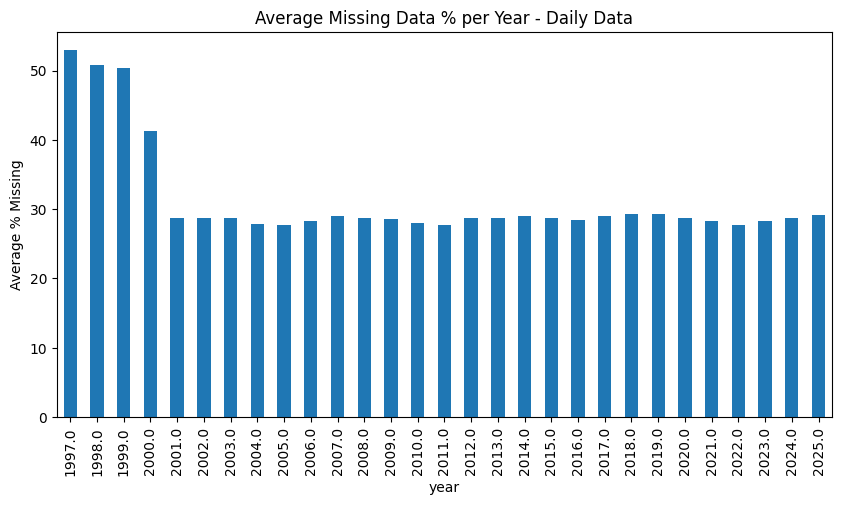

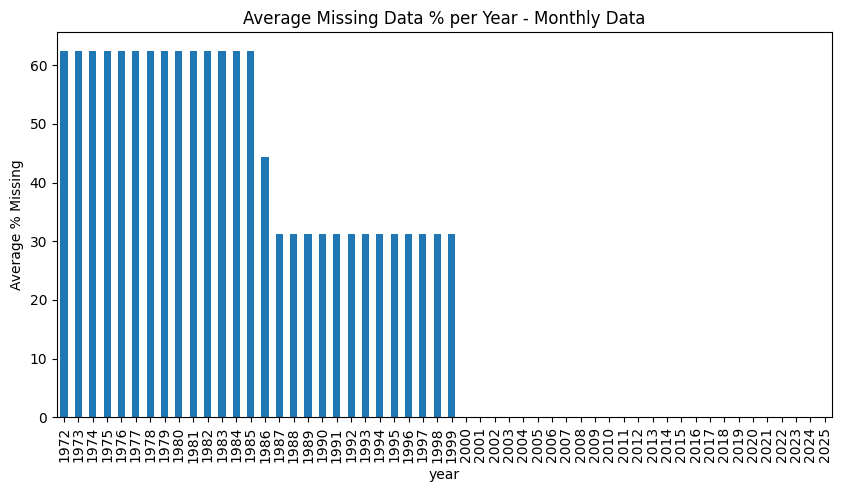

In [8]:
#MISSING DATA OVER TIME ANALYSES

# Voeg 'year' toe aan daily_df en monthly_df
daily_df['year'] = daily_df['years'].dt.year
monthly_df['year'] = monthly_df['years'].dt.year

# Groepeer per jaar en bereken % missing per maturiteit (kolom)
missing_per_year_daily = daily_df.groupby('year').apply(lambda x: x.isna().mean() * 100)
missing_per_year_monthly = monthly_df.groupby('year').apply(lambda x: x.isna().mean() * 100)

# Gemiddelde % missing over alle looptijden per jaar
avg_missing_per_year_daily = missing_per_year_daily.mean(axis=1)
avg_missing_per_year_monthly = missing_per_year_monthly.mean(axis=1)

print("\nAverage missing % per year - Daily:")
print(avg_missing_per_year_daily)

print("\nAverage missing % per year - Monthly:")
print(avg_missing_per_year_monthly)

# Plot
avg_missing_per_year_daily.plot(kind='bar', figsize=(10,5))
plt.ylabel('Average % Missing')
plt.title('Average Missing Data % per Year - Daily Data')
plt.show()

avg_missing_per_year_monthly.plot(kind='bar', figsize=(10,5))
plt.ylabel('Average % Missing')
plt.title('Average Missing Data % per Year - Monthly Data')
plt.show()





